<a href="https://colab.research.google.com/github/dernameistegal/airbnb_price/blob/main/data_transformations/listings_transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
path= ("/content/drive/MyDrive/Colab/airbnb/data/translations/translated_listings.pickle")
listings = pd.read_pickle(path)

In [32]:
# transform price
listings["price"] = (
    listings["price"].str.replace("$", "").str.replace(",", "").astype(float)
)

In [33]:
#remove zeros
print(len(listings[listings["price"] == 0]))
listings = listings[listings["price"] != 0]

5


In [34]:
# log price
listings["log_price"] = np.log(listings["price"])

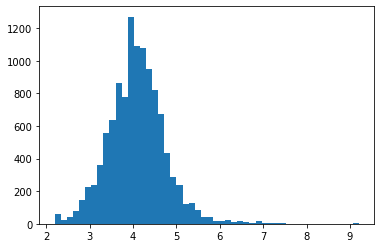

In [35]:
import matplotlib.pyplot as plt
plt.hist(listings["log_price"], bins=50)
plt.show()

In [ ]:
# recode variables
rooms = pd.get_dummies(listings["room_type"], prefix="room")
listings = listings.drop("room_type", axis=1)
listings["host_is_superhost"] = listings["host_is_superhost"].map(dict(t=1, f=0))
listings["host_identity_verified"] = listings["host_identity_verified"].map(
    dict(t=1, f=0)
)
listings = pd.concat([listings, rooms], axis=1)
listings

In [37]:
path = ("/content/drive/MyDrive/Colab/airbnb/data/translations/listings_workfile.pickle")
listings.to_pickle(path)